## Question #1 (50 points)

***This question consists of plotting and a conceptual question. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for anharmonically coupled oscillators, create a figure that superimposes

* a contour plot of the potential energy, and;
* the trajectory of $Q_1$ and $Q_2$.

### Point breakdown

* Contour plot (20 points)
* Trajectory plot (20 points)
* Physical explanation (10 points)

### The potential energy

$$ \Delta U = \frac{1}{2} K_1 Q_1^2 + \frac{1}{2} K_2 Q_2^2 + \frac{1}{3} C Q_1 Q_2^2 $$

### Constrained parameters and initial conditions

Take $K_1 = 1$, $K_2 = 0.2$, $M_1 = M_2 = 1$, and $C=0.5$. For the initial conditions, take $Q_1(0) = 0$, $Q_2(0) = 1$, and both velocities starting at zero.

### Plotting constraints
Plot $Q_1$ and $Q_2$ on the horizontal and vertical axes, respectively. I suggest a meshgrid of at least $100 \times 100$ points.

For your contour plot, combine `plt.contour` and `plt.contourf` with code similar to the following:

* `plt.contourf(Q1_grid, Q2_grid, U_grid, levels=50, cmap='viridis')`
* `plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='white', linewidths=1)`

Also, use `plt.xlim(-1.5, 1.5)` and `plt.ylim(-1.5, 1.5)`

Don't forget to label your axes.

### Getting and plotting the trajectory

To get the trajectory, you will need to set up and solve the equations of motion, as we did in previous homework and in class. Then you can plot $Q_2$ versus $Q_1$ with `matplotlib` using a line of code similar to `plt.plot(Q1, Q2, color='red', label="Trajectory")`.

Plot the trajectory from $t=0$ to $t=50$, with an appropriate choice of mesh points to ensure the trajectory is resolved. (e.g. `t_mesh = np.linspace(0, 50, 200)`)

### Physical explanation

With your code complete, you can test four cases for the initial conditions (all with the initial velocity set to zero):

1. $Q_1(0) = 0$, $Q_2(0) = 1$ (**submit this plot**)
2. $Q_1(0) = 0$, $Q_2(0) = -1$
3. $Q_1(0) = 1$, $Q_2(0) = 0$
4. $Q_1(0) = -1$, $Q_2(0) = 0$

Why do the dynamics differ when only $Q_1$ is initially displaced compared to when only $Q_2$ is initially displaced? How does this relate to the coupling term in the potential energy? What is the physical interpretation? You could use our cylindrical beam example from class to describe this, if you like.


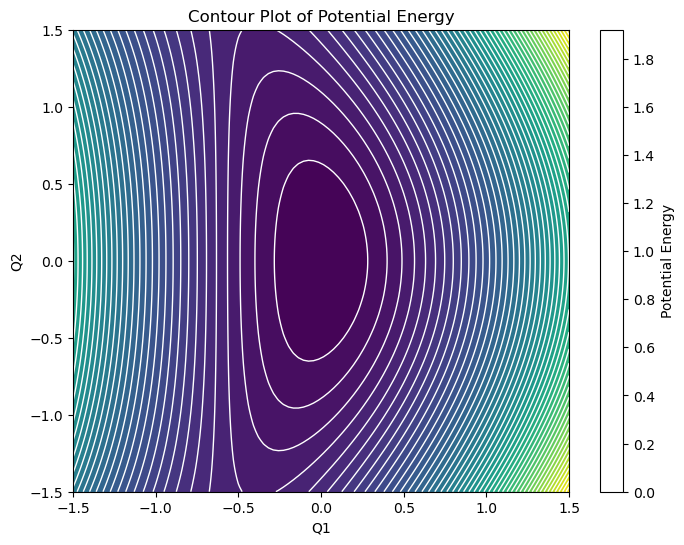

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

K1 = 1.0
K2 = 0.2
C = 0.5
M1 = 1.0
M2 = 1.0

def potential_energy(Q1, Q2):
    return 0.5 * K1 * Q1**2 + 0.5 * K2 * Q2**2 + (1/3) * C * Q1 * Q2**2
    
Q1_grid = np.linspace(-1.5, 1.5, 100)
Q2_grid = np.linspace(-1.5, 1.5, 100)
Q1, Q2 = np.meshgrid(Q1_grid, Q2_grid)
U = potential_energy(Q1, Q2)

plt.figure(figsize=(8, 6))
plt.contourf(Q1, Q2, U, levels=50, cmap='viridis')
plt.contour(Q1, Q2, U, levels=50, colors='white', linewidths=1)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel("Q1")
plt.ylabel("Q2")
plt.title("Contour Plot of Potential Energy")
plt.colorbar(label="Potential Energy")
plt.show()


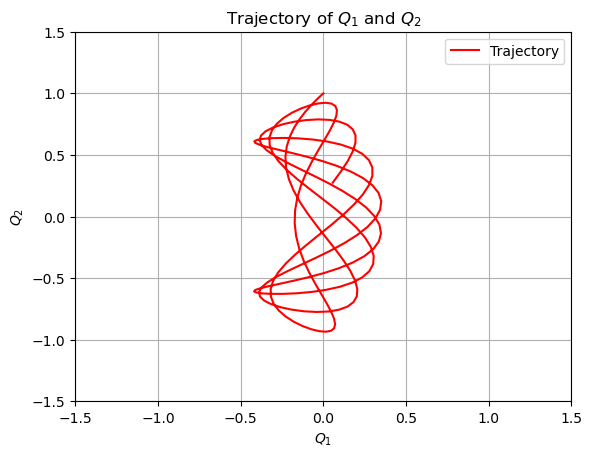

In [2]:
from scipy.integrate import solve_ivp

def equations(t, y):
    Q1, Q2, dQ1, dQ2 = y
    d2Q1 = -K1 * Q1 - (C / 3) * Q2**2
    d2Q2 = -K2 * Q2 - (2 * C / 3) * Q1 * Q2
    return [dQ1, dQ2, d2Q1, d2Q2]

y0 = [0, 1, 0, 0]
t_span = (0, 50)
t_mesh = np.linspace(0, 50, 200)
solution = solve_ivp(equations, t_span, y0, t_eval=t_mesh)

Q1_trajectory = solution.y[0]
Q2_trajectory = solution.y[1]

plt.plot(Q1_trajectory, Q2_trajectory, color='red', label='Trajectory')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('$Q_1$')
plt.ylabel('$Q_2$')
plt.title('Trajectory of $Q_1$ and $Q_2$')
plt.legend()
plt.grid()
plt.show()

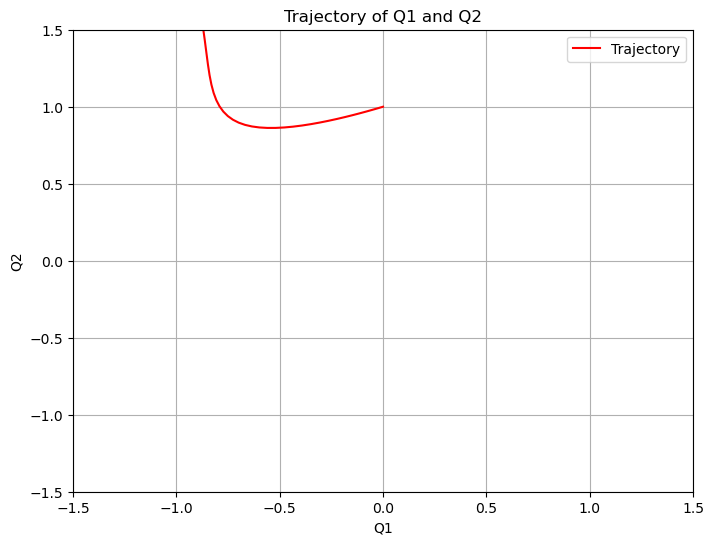

In [6]:
# Define the equations of motion
def equations(t, y):
    Q1, Q2, P1, P2 = y
    dQ1_dt = P1 / M1
    dQ2_dt = P2 / M2
    dP1_dt = -K1 * Q1 - C * Q2**2
    dP2_dt = -K2 * Q2 - 2 * C * Q1 * Q2
    return [dQ1_dt, dQ2_dt, dP1_dt, dP2_dt]

# Initial conditions
Q1_0 = 0.0
Q2_0 = 1.0
P1_0 = 0.0
P2_0 = 0.0
initial_conditions = [Q1_0, Q2_0, P1_0, P2_0]

# Time span
t_span = (0, 50)
t_eval = np.linspace(0, 50, 500)

# Solve the equations of motion
solution = solve_ivp(equations, t_span, initial_conditions, t_eval=t_eval, method='RK45')

# Extract the trajectory
Q1_traj = solution.y[0]
Q2_traj = solution.y[1]

# Plot the trajectory of Q2 versus Q1
plt.figure(figsize=(8, 6))
plt.plot(Q1_traj, Q2_traj, color='red', label="Trajectory")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel("Q1")
plt.ylabel("Q2")
plt.title("Trajectory of Q1 and Q2")
plt.legend()
plt.grid()
plt.show()


In [ ]:
Why do the dynamics differ when only q1 is initially displaced compared to when only q2 is initially displaced? How does this relate to the 
coupling term in the potential energy? What is the physical interpretation? You could use our cylindrical beam example from class to describe 
this, if you like.

The dynamics differ when only Q1 is initially displaced versus when only Q2 is initially displaced due to the nonlinear coupling term in the 
potential energy, 1/3CQ1Q2^2. This term causes the motion of Q1 to influence Q2 and the other way around, leading to energy transfer between the two
energys. When 𝑄1 is initially displaced, the coupling introduces a force on Q2 that grows as Q1 oscillates, gradually transferring energy to Q2. In 
contrast, when 𝑄2 is initially displaced, the force on Q1 depends on Q2^2, leading to more nonlinear and potentially asymmetric dynamics. The strength 
and nature of these interactions are governed by the coupling constant 𝐶, which determines how strongly the two energys affect each other. Physically,
this behavior reflects the interaction of distinct motions, where the coupling represents how one energy influences the other over time.







